## Introducción a Aprendizaje Automatico
Creado por [Kevin Markham](https://github.com/mpfrush/Python-Scikit-Learn-Exercises). Traducido y adaptado por Luis Martínez para Diplomado de Inteligencia Artificial en ITLA.

## Requerimientos
- Acceso a los cuadernos

### Jupyter Notebook
- Instalar Jupyter en PC o
- Correr Colab en Google Drive

### Instalación de Jupyter en PC
- Instalar Anaconda
- Si instaló Anaconda, debe tener ya Jupyter.
- Usar pip install. 
  - "python3 -m pip install jupyter" para Python 3
  - "python -m pip install jupyter" para Python 2
Pueden acceder a: https://jupyter.org/install

### Uso de Google Colab
- Tener cuenta de Google
- Acceder a su Google Drive y crear un cuaderno

## Importar librerias

Estar seguro de tener las siguientes librerias instalados (usar pip o conda):
- matplotlib
- pandas
- sklearn
- numpy


# Regresión Linear con Scikit-learn

## Agenda

- ¿Cómo usar la librería de Pandas para leer datos en Python?
- ¿Qué es regresión linear y cómo funciona?
- ¿Cómo yo entreno e interpreto una regresión linear en scikit-learn?
- ¿Cuáles son las metricas de evaluación para problemas de regresión linear?
- ¿Cómo eliges que atributos incluir en su modelo?

## Tipos de aprendizaje supervisado

- **Clasificación:** Predecir un valor categorico
- **Regresión:** Predecir un valor continuo

## Leer datos con Pandas

**Pandas:** popular biblioteca de Python para exploración, manipulación y análisis de datos

In [24]:
# TODO: Manera convencional de importar a Pandas
import pandas as pd

In [25]:
# Leer CSV directamente desde una URL y salvar resultados (Use ShareCSV)
data = pd.read_csv('http://www.sharecsv.com/dl/64e8201b3a3aab7ab850e7386151ca56/Advertising.csv', index_col=0)

# TODO: Muestra las primeras 5 filas
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Tipos de Objectos en Pandas:

- **DataFrame:** filas y columnas (como una hoja de cálculo)
- **Series:** una sola columna

In [26]:
# TODO: Muestra las últimas 5 filas
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [27]:
# TODO: Valida la forma del DataFrame (filas, columnas)
data.shape

(200, 4)

¿Cuáles son las características?
- **TV:** dólares de publicidad gastados en TV para un solo producto en un mercado determinado (en miles de dólares)
- **Radio:** dólares de publicidad gastados en Radio
- **Periódico:** dólares publicitarios gastados en el periódico

¿Cual es la respuesta/predicción?
- **Ventas:** ventas de un solo producto en un mercado determinado (en miles de artículos)

¿Qué más sabemos?
- Debido a que la variable de respuesta es continua, este es un problema de **regresión**.
- Hay 200 **observaciones** (representadas por las filas), y cada observación es un mercado único.

## Regresión linear

**Pros:** rápido, no requiere ajuste (tuning), altamente interpretable, bien entendido

**Contras:** es poco probable que produzca la mejor precisión predictiva (supone una relación lineal entre las características y la respuesta)

### Forma de Regresión linear

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ es la respuesta
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (primer atributo)
- $\beta_n$ es el coeficiente para $x_n$ (atributo n)

En este caso:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Periodico$

El valor $\beta$ es llamado **coeficientes del modelo**. Estos valores se "aprenden" durante el paso de ajuste/fit del modelo utilizando el criterio de "mínimos cuadrados". ¡Entonces, el modelo ajustado se puede usar para hacer predicciones!

## Preparando X & y usando Pandas

- scikit-learn espera X (matriz de atributos) & y (vector de clases) que sean arreglos de NumPy.
- Como sea, pandas está desarollado sobre NumPy.
- En consecuencia, X puede ser un DataFrame de Pandas & y puede ser una Series de Pandas!

In [28]:
# Crear una lista de Python de nombres de atributos
feature_cols = ['TV', 'Radio', 'Newspaper']

# TODO: Use la lista para seleccionar un subconjunto del DataFrame original
X = data[feature_cols]

# Comando equivalente para hacerlo en una linea
X = data[['TV', 'Radio', 'Newspaper']]

# TODO: Imprimir las primeras 5 filas
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [29]:
# TODO: Validar el tipo y forma de X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [30]:
# Selecciona una serie del DataFrame
y = data['Sales']

# Comando equivalente que funciona solo si el nombre de columna no tiene espacios
y = data.Sales

# TODO: Imprimir las 5 primeras filas
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [31]:
# TODO: Validar tipo y forma de y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Separando X & y en sets de entrenamiento y prueba

In [32]:
#TODO: Importar correspondiente para separar en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
# Separacion por defecto es 75%/25%
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Regresión linear en scikit-learn

In [34]:
# TODO: Importar modelo
from sklearn.linear_model import LinearRegression

# TODO: Instanciar
linreg = LinearRegression()

# TODO: Ajustar/fit el modelo a los datos de entrenamiento (aprender los coeficientes)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpretar coeficientes del modelo

In [35]:
# Imprimir interceptos y coeficientes
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [36]:
# Par de nombre de atributos con sus coeficientes
zip(feature_cols, linreg.coef_)

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

¿Cómo interpretamos el **coeficiente de TV** (0.0466)?

- Para una cantidad determinada de gasto en anuncios de radio y periódicos, **un aumento de "unidad" en el gasto de anuncios de televisión** se asocia con un aumento de **0.0466 "unidad" en ventas**.
- O más claramente: para una cantidad dada de gasto en anuncios de radio y periódicos, **$1,000 adicionales gastados en anuncios de televisión** se asocian con un **aumento en las ventas de 46.6 artículos**.

Notas importantes:

- Esta es una declaración de **asociación**, no **causalidad**.
- Si un aumento en el gasto en publicidad televisiva se asociara con una **disminución** en las ventas, $ \ beta_1 $ sería **negativo**.

### Haciendo predicciones

In [37]:
# TODO: Hacer predicciones en el test/prueba set
y_pred = linreg.predict(X_test)

¡Necesitamos una **métrica de evaluación** para comparar nuestras predicciones con los valores reales!


## Modelo de métricas de evaluación para regresión

Las métricas de evaluación para problemas de clasificación, como **precisión**, no son útiles para problemas de regresión. En cambio, necesitamos métricas de evaluación diseñadas para comparar valores continuos.

Creemos algunas predicciones numéricas de ejemplo y calculemos **tres métricas de evaluación comunes** para problemas de regresión:

In [38]:
# Define valores reales y de predicción 
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error/Error absoluto medio** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [39]:
# Calcular MAE a mano
print((10 + 0 + 20 + 10)/4.)

# Calcular MAE usando scikit-learn
# TODO: Importar clase de Scikit learn para metricas
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error/Error cuadrado medio** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [40]:
# Calcular MSE a mano
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# Calcular MSE usando scikit-learn
# TODO: Especificar que clase de scikit learn se usa para metricas
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error/Error cuadrático medio** (RMSE) es la raíz cuadrada de la media de los errores cuadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [41]:
# Calcular RMSE a mano
# TODO: Importar NumPy con su convención común y usarlo para calcular el SQRT
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# Calcular RMSE usando scikit-learn
# TODO: Especificar que clase de scikit learn se usa para metricas
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" errores más grandes.
- **RMSE** es aún más popular que MSE, porque RMSE es interpretable en las unidades "y".

### Computando RMSE para nuestra predición de Ventas (Sales)

In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


## Selección de Atributos

¿**Newspaper** "pertenece" a nuestro modelo? En otras palabras, ¿mejora la calidad de nuestras predicciones?

¡**eliminémoslo** del modelo y verifiquemos el RMSE!

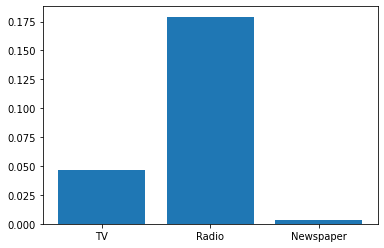

In [53]:
import matplotlib.pyplot as plt

importance = linreg.coef_

# Visualizar importancia de cada feature
plt.bar([feature_cols[x] for x in range(len(importance))], importance)
plt.show()

In [20]:
# Crear una lista de Python de nombres de atributos
feature_cols = ['TV', 'Radio']

# Use la lista para seleccionar un subconjunto del DataFrame original
X = data[feature_cols]

# Seleccionar una serie del DataFrame
y = data.Sales

# TODO: Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# TODO: Ajustar/fit el modelo a data de entrenamiento (aprender coeficientes)
linreg.fit(X_train, y_train)

# TODO: Hacer predicciones en test/prueba
y_pred = linreg.predict(X_test)

# Computar RMSE de nuestras prediciones
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


El RMSE **disminuyó** cuando eliminamos el Periódico/Newspaper del modelo. (El error es algo que queremos minimizar, por lo tanto, **un número menor para RMSE es mejor**.) Por lo tanto, es poco probable que esta función sea útil para predecir Ventas y deba eliminarse del modelo.